# An Introductory Example


<a id='index-0'></a>

## Example 1: Plotting a White Noise Process

Suppose we want to simulate and plot the [Gaussian white noise](https://en.wikipedia.org/wiki/White_noise)
process $ \epsilon_0, \epsilon_1, \ldots, \epsilon_T $, where each draw $ \epsilon_t $ is independent standard normal.

We’ll do this in several different ways, each time learning something more about Python.

We run the following command first, which helps ensure that plots appear in the notebook.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9,6)


## Version 1

<a id='ourfirstprog'></a>
Here are a few lines of code that perform the task we set

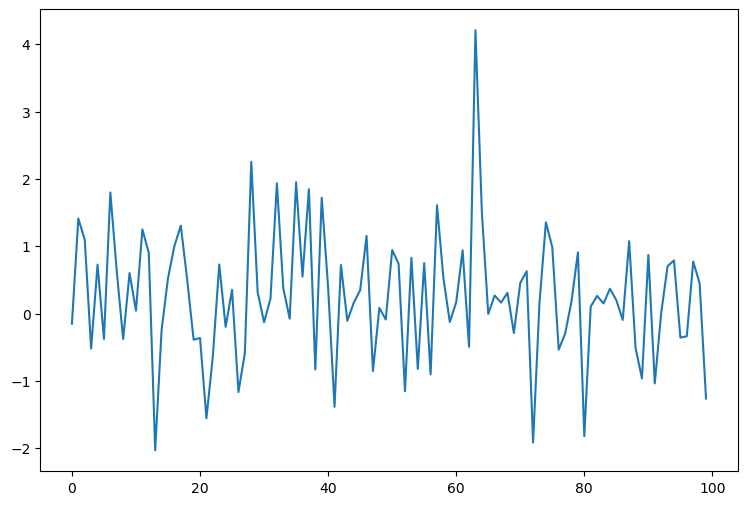

In [2]:
import numpy as np

ϵ_values = np.random.randn(100)
plt.plot(ϵ_values)
plt.show()

Let’s break this program down and see how it works.


<a id='import'></a>

### Imports

The first line imports [NumPy](https://python-programming.quantecon.org/numpy.html), a favorite Python package for tasks like

- working with arrays (vectors and matrices)  
- common mathematical functions like `cos` and `sqrt`  
- generating random numbers  
- linear algebra, etc.  


After `import numpy as np` we have access to these attributes via the syntax `np.attribute`.

Here’s two more examples

In [3]:
np.sqrt(4)

2.0

In [4]:
np.log(4)

1.3862943611198906

We could also use the following syntax:

In [5]:
import numpy

numpy.sqrt(4)

2.0

But the former method (using the short name `np`) is convenient and more standard.

#### Why So Many Imports?

Python programs typically require several import statements.

The reason is that the core language is deliberately kept small, so that it’s easy to learn and maintain.

When you want to do something interesting with Python, you almost always need to import additional functionality.

#### Packages

As stated above, NumPy is a Python *package*.

Packages are used by developers to organize code they wish to share.

In fact, a package is just a directory containing

1. files with Python code — called **modules** in Python speak  
1. possibly some compiled code that can be accessed by Python (e.g., functions compiled from C or FORTRAN code)  
1. a file called `__init__.py` that specifies what will be executed when we type `import package_name`  


In fact, you can find and explore the directory for NumPy on your computer easily enough if you look around.

On a mac, it’s located in

```ipython
opt/anaconda3/lib/python3.8/site-packages/numpy
```


#### Subpackages


<a id='index-2'></a>
Consider the line `ϵ_values = np.random.randn(100)`.

Here `np` refers to the package NumPy, while `random` is a **subpackage** of NumPy.

Subpackages are just packages that are subdirectories of another package.

### Importing Names Directly

Recall this code that we saw above

In [6]:
import numpy as np

np.sqrt(4)

2.0

Here’s another way to access NumPy’s square root function

In [7]:
from numpy import sqrt

sqrt(4)

2.0

This is also fine, but not recommended.

The advantage is less typing if we use `sqrt` often in our code.

The disadvantage is that, in a long program, these two lines might be separated by many other lines. Then it’s harder for readers to know where `sqrt` came from.

### Random Draws

Returning to our program that plots white noise, the remaining three lines after the import statements are:

In [8]:
ϵ_values = np.random.randn(100)

This ine generates 100 (quasi) independent standard normals and stores them in `ϵ_values`.



In [9]:
ϵ_values

array([-1.68759817,  2.15906672,  0.48605479,  1.38921883, -1.27297782,
       -0.26929137,  1.52388324, -1.27956909,  1.31690826,  2.33698254,
       -1.56749437,  0.92201426,  0.24040342, -1.09619246, -0.1684829 ,
        1.69860526,  0.99403361, -0.00806794,  0.6940309 , -0.45512259,
        0.12998444, -0.17888917,  0.15130429, -0.55670116,  1.2110826 ,
       -1.60083446, -0.01884162, -1.05021879,  1.47955395,  0.60644088,
       -0.90896856, -0.43542971,  0.51275171, -0.04039891,  0.04469555,
       -0.30549503, -0.11813238, -1.74141367, -0.43166013,  0.77890565,
       -0.89103384, -0.40995737, -1.20986425, -0.82518082, -0.12213635,
       -0.68207723,  0.82362912, -0.2639696 , -0.51583734,  0.22316827,
       -0.56606547,  1.94312509, -0.91456505, -0.67037029,  0.02054663,
       -0.46471994, -0.70787801,  0.34556831,  0.80853491, -0.26993545,
       -0.04335683, -1.06171307, -0.28948742,  0.25360607, -0.40818292,
        0.05235106,  0.77039219, -1.11455889,  0.03434524,  0.46

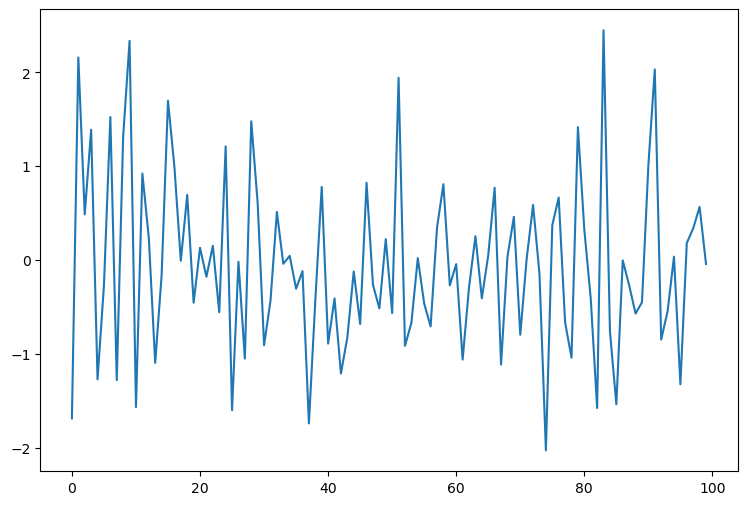

In [10]:
plt.plot(ϵ_values)
plt.show()

These two lines genererate the plot. We will look at various ways to configure and improve this plot below.

## Version 2: Iterative Methods

Let’s try writing some alternative versions of [our first program](#ourfirstprog), which plotted IID draws from the normal distribution.

The programs below are **less efficient** than the original one, and hence somewhat artificial. But they do help us illustrate some important Python syntax and semantics in a familiar setting.

### with a for loop

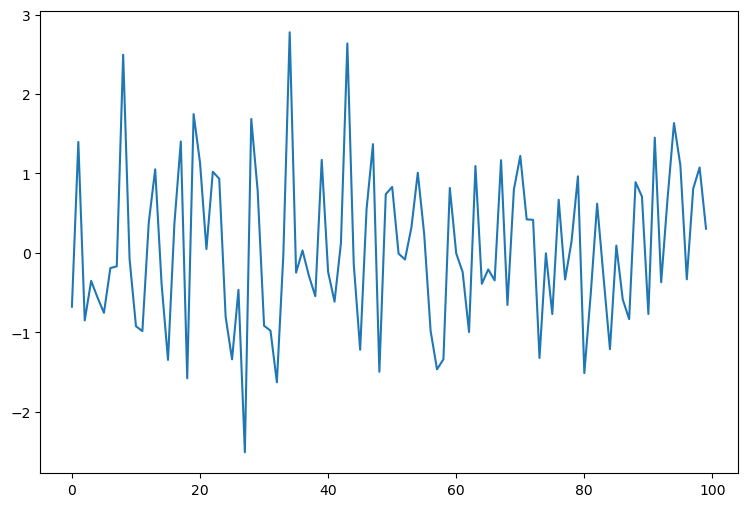

In [11]:
ts_length = 100
ϵ_values = []   # empty list

for i in range(ts_length):
    e = np.random.randn()
    ϵ_values.append(e)

plt.plot(ϵ_values)
plt.show()

In brief,

- The first line sets the desired length of the time series.  
- The next line creates an empty *list* called `ϵ_values` that will store the $ \epsilon_t $ values as we generate them.  
- The statement `# empty list` is a *comment*, and is ignored by Python’s interpreter.  
- The next three lines are the `for` loop, which repeatedly draws a new random number $ \epsilon_t $ and appends it to the end of the list `ϵ_values`.  
- The last two lines generate the plot and display it to the user.  


Let’s study some parts of this program in more detail.


<a id='lists-ref'></a>

### Lists


<a id='index-3'></a>
Consider the statement `ϵ_values = []`, which creates an empty list.

Lists are a *native Python data structure* used to group a collection of objects.

For example, try

In [12]:
x = [10, 'foo', False]
type(x)

list

In [13]:
type(False)

bool

The first element of `x` is an [integer](https://en.wikipedia.org/wiki/Integer_%28computer_science%29), the next is a [string](https://en.wikipedia.org/wiki/String_%28computer_science%29), and the third is a [Boolean value](https://en.wikipedia.org/wiki/Boolean_data_type).

When adding a value to a list, we can use the syntax `list_name.append(some_value)`

In [14]:
x

[10, 'foo', False]

In [15]:
x.append(2.5)
x

[10, 'foo', False, 2.5]

Here `append()` is what’s called a *method*, which is a function “attached to” an object—in this case, the list `x`.

We’ll learn all about methods later on, but just to give you some idea,

- Python objects such as lists, strings, etc. all have methods that are used to manipulate the data contained in the object.  
- String objects have [string methods](https://docs.python.org/3/library/stdtypes.html#string-methods), list objects have [list methods](https://docs.python.org/3/tutorial/datastructures.html#more-on-lists), etc.  


Another useful list method is `pop()`

In [16]:
x

[10, 'foo', False, 2.5]

In [17]:
x.pop()

2.5

In [18]:
x

[10, 'foo', False]

Lists in Python are zero-based (as in C, Java or Go), so the first element is referenced by `x[0]`

In [19]:
x[0]   # first element of x

10

In [20]:
x[1]   # second element of x

'foo'

### The For Loop Block


In [21]:
for i in range(ts_length):
    e = np.random.randn()
    ϵ_values.append(e)

Python executes the two indented lines `ts_length` times before moving on.

These two lines are called a `code block`, since they comprise the “block” of code that we are looping over.

Unlike most other languages, Python knows the extent of the code block *only from indentation*.

In our program, indentation decreases after line `ϵ_values.append(e)`, telling Python that this line marks the lower limit of the code block.


In [22]:
animals = ['dog', 'cat', 'bird']
for animal in animals:
    print("The plural of " + animal + " is " + animal + "s")

The plural of dog is dogs
The plural of cat is cats
The plural of bird is birds


This example helps to clarify how the `for` loop works:  When we execute a
loop of the form

```python3
for variable_name in sequence:
    <code block>
```


The Python interpreter performs the following:

- For each element of the `sequence`, it “binds” the name `variable_name` to that element and then executes the code block.  


### A Comment on Indentation


<a id='index-5'></a>
In discussing the `for` loop, we explained that the code blocks being looped over are delimited by indentation.

In fact, in Python, **all** code blocks (i.e., those occurring inside loops, if clauses, function definitions, etc.) are delimited by indentation.

Thus, unlike most other languages, whitespace in Python code affects the output of the program.

Once you get used to it, this is a good thing: It

- forces clean, consistent indentation, improving readability  
- removes clutter, such as the brackets or end statements used in other languages  


On the other hand, it takes a bit of care to get right, so please remember:

- The line before the start of a code block always ends in a colon  
  - `for i in range(10):`  
  - `if x > y:`  
  - `while x < 100:`  
  - etc., etc.  
- All lines in a code block **must have the same amount of indentation**.  
- The Python standard is 4 spaces, and that’s what you should use.  

### with a while loop


The `for` loop is the most common technique for iteration in Python. But, for the purpose of illustration, let’s modify the program above to use a `while` loop instead.


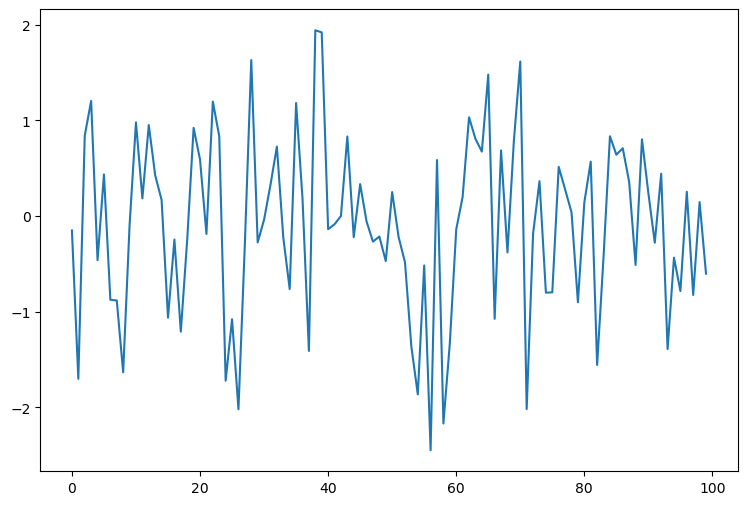

In [23]:
ts_length = 100
ϵ_values = []
i = 0
while i < ts_length:
    e = np.random.randn()
    ϵ_values.append(e)
    i += 1
plt.plot(ϵ_values)
plt.show()

## Example 2: Plotting Bank Account over Time

We compute ad plot the balance of a bank account over time assuming that there are no withdraws over the time period. 

The last date is denoted by $ T $. The initial balance is $ b_0 $ and the fixed interest rate is $ r $.

The balance updates from period $ t $ to $ t+1 $ according to $ b_{t+1} = (1 + r) b_t $.

In the code below, we generate and plot the sequence $ b_0, b_1, \ldots, b_T $.

Instead of using a Python list to store this sequence, we will use a NumPy array in this example.

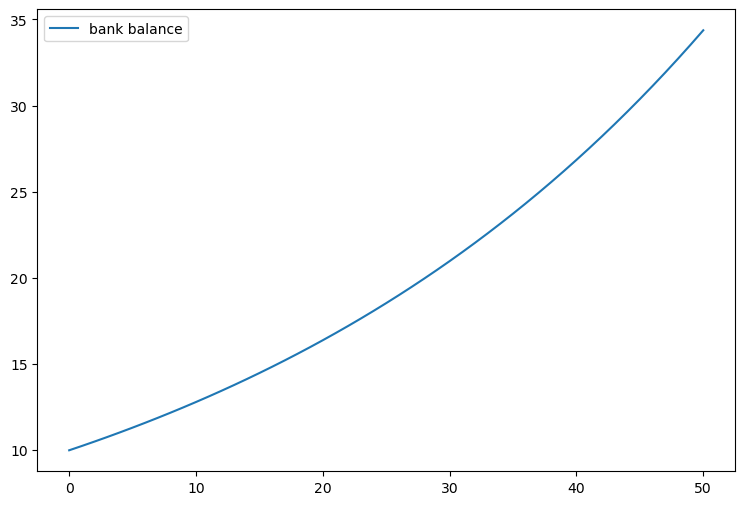

In [24]:
r = 0.025         # interest rate
T = 50            # end date
b = np.empty(T+1) # an empty NumPy array, to store all b_t
b[0] = 10         # initial balance

for t in range(T):
    b[t+1] = (1 + r) * b[t]

plt.plot(b, label='bank balance')
plt.legend()
plt.show()

The statement `b = np.empty(T+1)` allocates storage in memory for `T+1` (floating point) numbers.

These numbers are filled in by the `for` loop.

Allocating memory at the start is more efficient than using a Python list and `append`, since the latter must repeatedly ask for storage space from the operating system.

**Important Remark:** Unlike an empty list, an empty Numpy array is not *literally* empty, it contains some values of the data type specified (with default type being float64).

In [25]:
np.empty([3,2], dtype=int)

array([[4600422015359375698, 4599746475415270124],
       [4600422015359375698, 4617267354465586090],
       [4619961069992707068, 4599746475415270124]])

## Example 3: A Correlated Random Variable

In this example we simulate and plot the correlated random variable.

$$
x_{t+1} = \alpha \, x_t + \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 0
\quad \text{and} \quad t = 0,\ldots,T
$$

The sequence of shocks $ \{\epsilon_t\} $ is assumed to be IID and standard normal. Set $ T=200 $ and $ \alpha = 0.9 $.

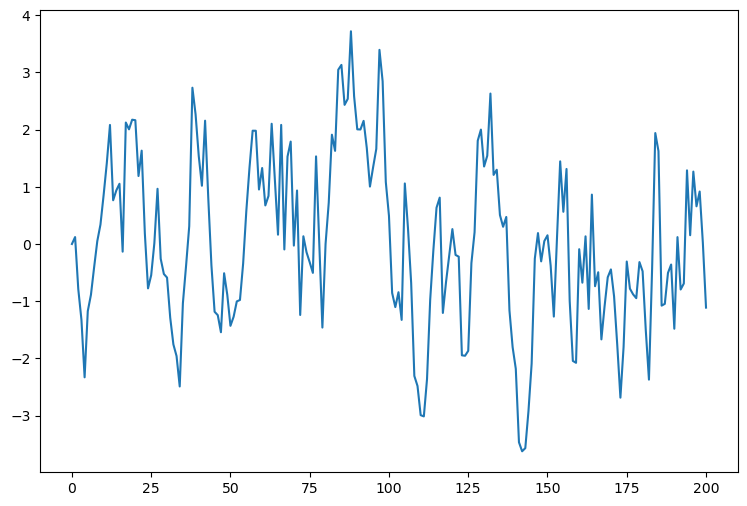

In [26]:
import numpy as np
import matplotlib.pyplot as plt

α = 0.8
T = 200
x = np.empty(T+1)
x[0] = 0

for t in range(T):
    x[t+1] = α * x[t] + np.random.randn()

plt.plot(x)
plt.show()

Add more simulated series with different $\alpha$'s using a `for` loop: $\alpha=0 $, $0.8 $, $0.98 $.


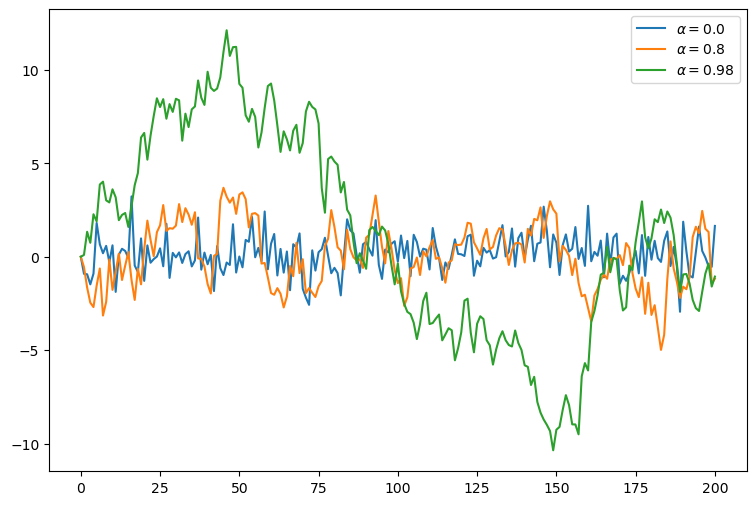

In [27]:
α_values = [0.0, 0.8, 0.98]
T = 200
x = np.empty(T+1)

for α in α_values:
    x[0] = 0
    for t in range(T):
        x[t+1] = α * x[t] + np.random.randn()
    plt.plot(x, label=f'$\\alpha = {α}$')

plt.legend()
plt.show()

## Example 4: Another Correlated Random Variable

Plot the time series

$$
x_{t+1} = \alpha \, |x_t| + \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 0
\quad \text{and} \quad t = 0,\ldots,T
$$

Use $ T=200 $, $ \alpha = 0.9 $ and $ \{\epsilon_t\} $ as before.


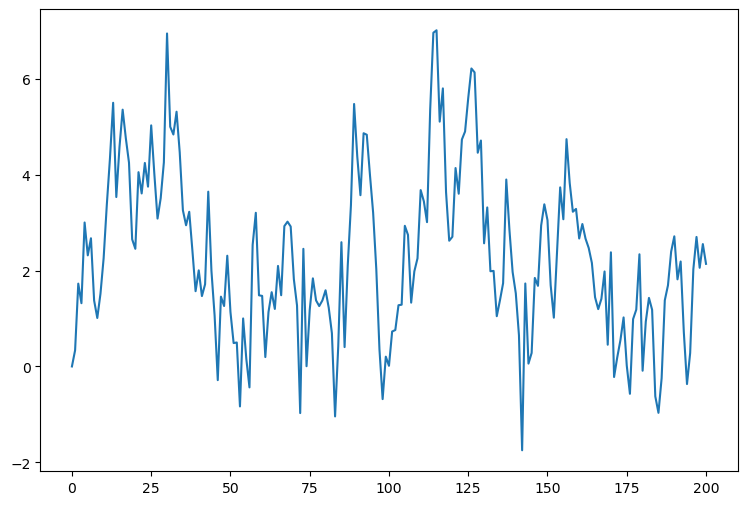

In [28]:
α = 0.9
T = 200
x = np.empty(T+1)
x[0] = 0

for t in range(T):
    x[t+1] = α * np.abs(x[t]) + np.random.randn()

plt.plot(x)
plt.show()

The following code is another way to implement the above without *np.abs*:

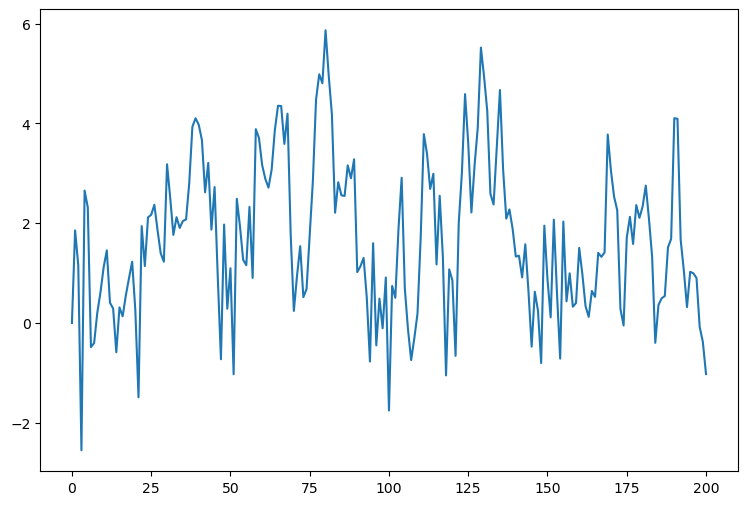

In [29]:
α = 0.9
T = 200
x = np.empty(T+1)
x[0] = 0

for t in range(T):
    abs_x = - x[t] if x[t] < 0 else x[t]
    x[t+1] = α * abs_x + np.random.randn()

plt.plot(x)
plt.show()